In [32]:
# import export
# https://aroussi.com/post/python-yahoo-finance
# https://pandas-datareader.readthedocs.io/en/latest/remote_data.html#historical-time-series-data
import yfinance as yf
from pandas_datareader import data as web
ALPHAVANTAGE_API_KEY = "E2S9WCQXMIMBMR61"
AVAILABLE_THREADS = 2

# finance libraries
import pandas as pd
import numpy as np

# plot libraries 
import seaborn as sns
from matplotlib.ticker import AutoMinorLocator
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,5)



In [33]:
# Retrieving tickers symbols

# stocks
stock_list = pd.read_csv('data_finance/stocks.csv')['symbol_yf'].tolist()
# index
index_csv = pd.read_csv('data_finance/index.csv')
pref_index = ['^DJI','^IXIC','^FCHI', '^FTSE', '^STOXX50E', '^HSI', '^N225']
index_list = index_csv[index_csv['symbol_yf'].isin(['^DJI','^IXIC','^FCHI', '^FTSE', '^STOXX50E', '^HSI', '^N225'])]['symbol_yf'].tolist()
# vix
vix_list = pd.read_csv('data_finance/vix.csv')['symbol_fred'].tolist()
# currency
currency_list = pd.read_csv('data_finance/currencies.csv')['symbol_yf'].tolist()

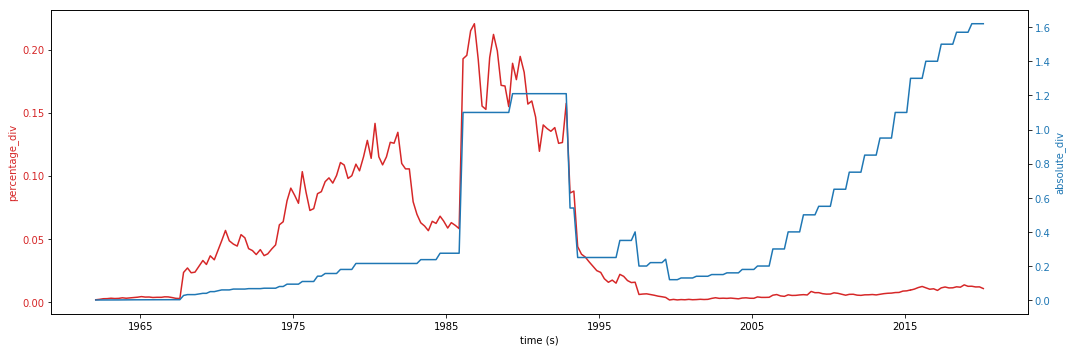

In [34]:
msft = yf.Ticker("IBM")
# get stock info
msft.info
percentage_div = msft.dividends / msft.history(period="max")['Close'].loc[msft.dividends.index]

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('percentage_div', color=color)
ax1.plot(percentage_div, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('absolute_div', color=color)  # we already handled the x-label with ax1
ax2.plot(msft.dividends, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

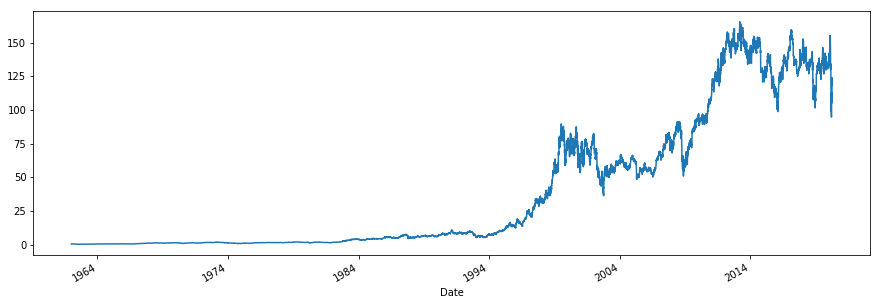

In [35]:
#ajouter au graph d'au dessus avec un 3eme axe
msft.history(period='max')['Close'].plot()


[*********************100%***********************]  15 of 15 completed


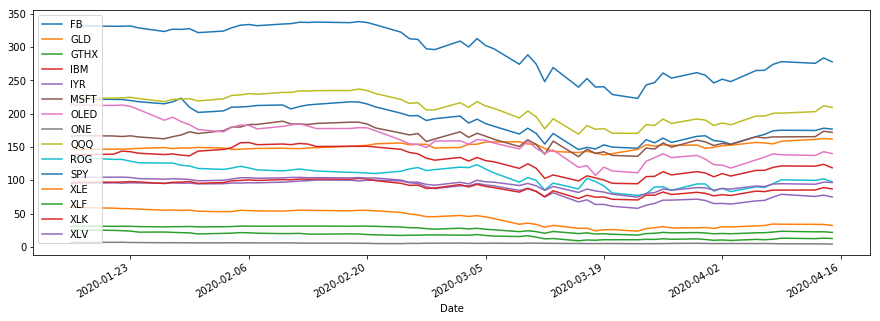

In [36]:
data = yf.download(stock_list, period="3mo", thread = AVAILABLE_THREADS)['Close']
data.plot()
plt.show()


[*********************100%***********************]  7 of 7 completed


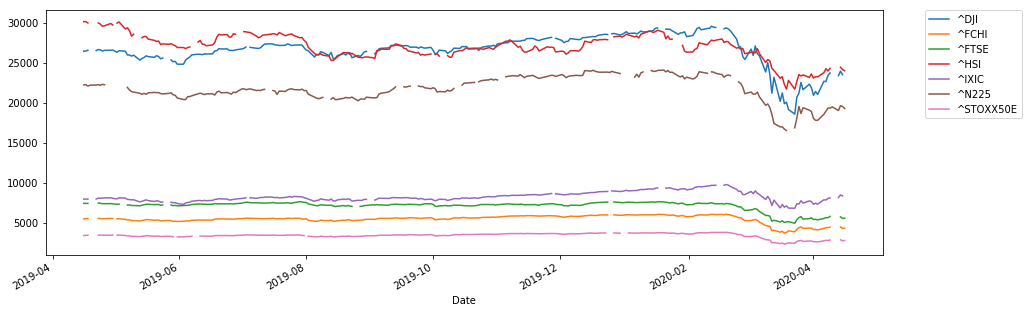

In [37]:
data = yf.download(index_list, period="1Y", thread = AVAILABLE_THREADS)['Close']
data.plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


/Users/nielsou/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


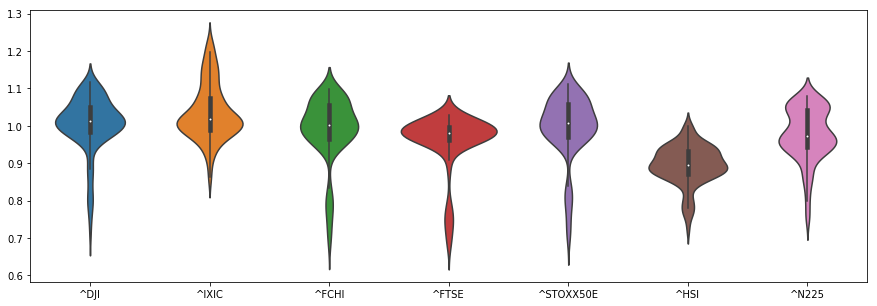

In [38]:
# running various draws of most common index 
favourite_index = ['^DJI','^IXIC','^FCHI', '^FTSE', '^STOXX50E', '^HSI', '^N225']
scaled_index = data[favourite_index]/data[favourite_index].iloc[1]
scaled_index.to_csv('logs/prefered_scaled_index.csv')
ax = sns.violinplot(data=scaled_index)

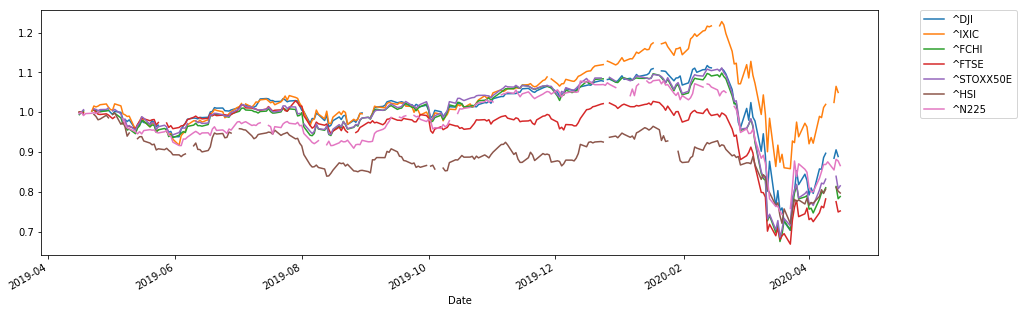

In [39]:
scaled_index.plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

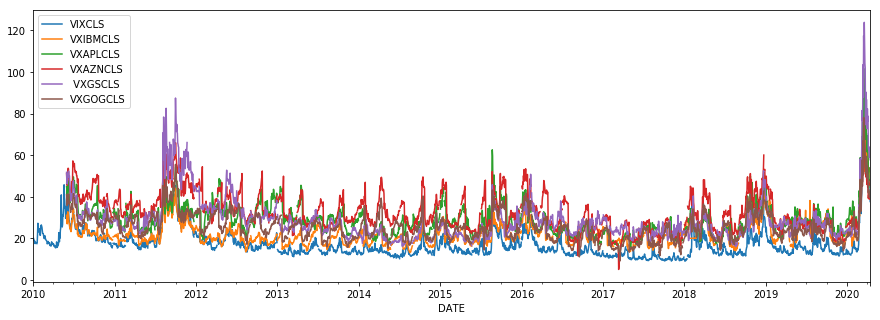

In [40]:
# retrieving vix volatilities levels
vixs = web.DataReader(vix_list, data_source='fred', start='2010-1-1', api_key=ALPHAVANTAGE_API_KEY)
vixs.plot()

In [49]:
# retrieving exchange rates
fx = yf.download(' EURJPY=X', period="1Y", thread = AVAILABLE_THREADS)


[*********************100%***********************]  1 of 1 completed


In [48]:
fx = yf.download(currency_list, period="1Y", thread = AVAILABLE_THREADS)


[*********************100%***********************]  3 of 3 completed

3 Failed downloads:
-  EURJPY=X: No data found, symbol may be delisted
-  EURKRW=X: No data found, symbol may be delisted
-  EURUSD=X: No data found, symbol may be delisted


In [50]:
fx

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-04-16,126.547997,126.667000,126.226997,126.549004,126.549004,0
2019-04-17,126.333000,126.793999,126.333000,126.337997,126.337997,0
2019-04-18,126.560997,126.560997,125.720001,126.544998,126.544998,0
2019-04-19,125.819000,125.879997,125.699997,125.820999,125.820999,0
2019-04-22,125.832001,126.056000,125.739998,125.827003,125.827003,0
...,...,...,...,...,...,...
2020-04-10,118.567001,118.723000,118.379997,118.592003,118.592003,0
2020-04-13,118.427002,118.447998,117.306999,118.428001,118.428001,0
2020-04-14,117.527000,117.932999,117.388000,117.537003,117.537003,0
